### K-Mode Clustering:
- K-Mode Clustering is an unsupervised machine-learning used to group categorical data into k-clusters (groups).
- The K-Modes clustering partitions data into two mutually exclusive groups.
- Unlike K-Means which uses the distance between numbers.
- K-Mode uses the number of mismatches between categorical values to decide how similar two data points.
- For Example -
  - Data Point1 = ["red", "small", "Round"].
  - Data Point2 = ["Green", "large", "Square"].
### When Should you Use K-Modes?
- Use K-Modes when -
  1. Your dataset contains categorical variables like gender, color, brand etc..
  2. You want to group customers by product preferences
  3. You're analyzing survey responses Yes/No, Male/Female etc.

### How K-Modes Clustering works?
1. Start by picking clusters - Randomly select K data points from a dataset act as the starting clusters these called "modes".
2. Assign data to clusters - Check how similar each data point is to the clusters using the total number of mismatches and assign each data point to the cluster it matches the most.
3. Update the clusters - Find the most common value for each cluster and update the cluster centers based on this.
4. Repeat the process - Keep repeating steps 2 and 3 until no data points are reassigned to different clusters.
- Overall the goal of K-Mode clusering is to minimize the dissimilarities between the data objects and the centroids(modes) of the clusters using a measure of categorical similarity such as the hamming distance.

### Implementing the K-Mode Clustering:
#### Step 1: Prepare Your Data:


In [1]:
import pandas as pd
import numpy as np

data = np.array([
    ['A', 'B', 'C'],
    ['B', 'C', 'A'],
    ['C', 'A', 'B'],
    ['A', 'C', 'B'],
    ['A', 'A', 'B']
])

#### Step 2: Set Number of clusters:
- Decide how many groups you want to divide your data.

In [2]:
k = 2

#### Step 3: Pick starting Points(modes):
- Randomly chose K rows from the data to be the starting cluster centers.

In [3]:
np.random.seed(0)
modes = data[np.random.choice(data.shape[0], k, replace=False)]

#### Step 4: Assign Data to Clusters:
- For each data point, count how many features are different from each mode.
- Assign the point to the most similar cluster.

In [4]:
clusters = np.zeros(data.shape[0], dtype=int)

for _ in range(10):
    for i, point in enumerate(data):
        distances = [np.sum(point!= mode) for mode in modes ]
        clusters[i] = np.argmin(distances)
        

#### Step 5: Update the Clusters:
- Find the most common value of each cluster and update the cluster center based on this. 

In [5]:
for j in range(k):
    if np.any(clusters == j):
        modes[j] = pd.DataFrame(data[clusters == j]).mode().iloc[0].values

#### Step 6: View Final Results:
- Print out which cluster each data belong to and what the final cluster centers (modes) are.

In [7]:
print("Cluser assignment:", clusters)
print("Cluster modes:\n", modes)

Cluser assignment: [1 0 0 0 0]
Cluster modes:
 [['A' 'A' 'B']
 ['A' 'B' 'C']]


### Cluster with kmodes Library:
- Elbow method is used to find the optimal number of clusters.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 7.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 4.0
Run 1, iteration: 2/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 4.0
Run 2, iteration: 2/100, moves: 0, cost: 4.0
Init: initial

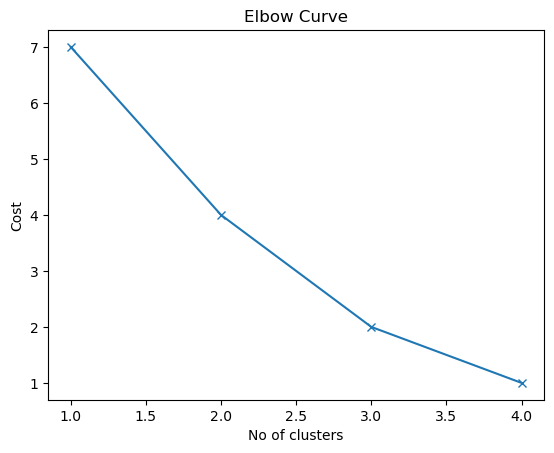

In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
%matplotlib inline

cost = []
K = range(1,5)
for k in list(K):
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'x-')
plt.xlabel('No of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

In [15]:
kmode = KModes(n_clusters=2, init="random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 4.0
Run 2, iteration: 2/100, moves: 0, cost: 4.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 5.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5.0
Best run was number 2


array([0, 1, 0, 0, 0], dtype=uint16)